In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
from google.colab import files

In [ ]:
# Unggah dataset
uploaded = files.upload()

Saving Dataset_restaurant.csv to Dataset_restaurant.csv


In [ ]:
# Load dataset
data = pd.read_csv("Dataset_restaurant.csv", sep=";")

In [ ]:
# Konversi kolom 'rating', 'latitude', dan 'longitude' menjadi float
data['latitude'] = data['latitude'].str.replace(',', '.').astype(float)
data['longitude'] = data['longitude'].str.replace(',', '.').astype(float)

# Koordinat pusat kota (Alun-alun Malang)
center_lat, center_lon = -7.9826145, 112.6308113

# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius bumi dalam km
    return c * r

# Hitung jarak
data['distance_to_center'] = haversine(data['latitude'], data['longitude'], center_lat, center_lon)

# Normalisasi jarak
scaler = MinMaxScaler()
data['distance_to_center'] = scaler.fit_transform(data[['distance_to_center']])

print(data)


                                             title  \
0                        Warung Lesehan Yogyakarta   
1          Baegopa? House Of Hungry Kandang Malang   
2                                Nakoa Cafe Dinoyo   
3    Kakkoii Japanese BBQ & Shabu - Soekarno Hatta   
4                         Ketoprak Aa Khas Jakarta   
..                                             ...   
115                                     Najwa food   
116                             Warung Ayam Pemuda   
117                                    WG Culinary   
118                             Bebek Pedas Madura   
119                             Angkringan SA'JATI   

                      categories  \
0             Restoran Indonesia   
1          Restoran Masakan Ayam   
2                           Kafe   
3                Restoran Jepang   
4    Kedai Sarapan & Makan Siang   
..                           ...   
115                   Food court   
116                   Food court   
117                   Food 

In [ ]:
# Input dan output
X = data[['distance_to_center']].values
y = 1 / (1 + data['distance_to_center'].values)  # Skor relevansi (jarak terbalik)

# Bangun model
model = tf.keras.Sequential([
    layers.Input(shape=(X.shape[1],)),  # Jumlah fitur input
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Skor antara 0-1
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Training model
history = model.fit(X, y, epochs=10, batch_size=1, validation_split=0.2)

# Prediksi skor relevansi
predictions = model.predict(X)
data['predicted_score'] = predictions

# Tampilkan nama, jarak (asli), dan skor prediksi
# Denormalisasi jarak agar kembali ke skala asli
data['distance_to_center_km'] = scaler.inverse_transform(data[['distance_to_center']])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0049 - mae: 0.0552 - val_loss: 0.0115 - val_mae: 0.0580
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0038 - mae: 0.0491 - val_loss: 0.0110 - val_mae: 0.0557
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mae: 0.0440 - val_loss: 0.0105 - val_mae: 0.0533
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - mae: 0.0430 - val_loss: 0.0099 - val_mae: 0.0507
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - mae: 0.0352 - val_loss: 0.0094 - val_mae: 0.0492
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - mae: 0.0367 - val_loss: 0.0087 - val_mae: 0.0447
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - mae: 0.0281 - val_loss: 0.0079 - val_mae: 0.0401
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - mae: 0.0264 - val_loss: 0.0069 - val_mae: 0.0328
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6668e-04 - m

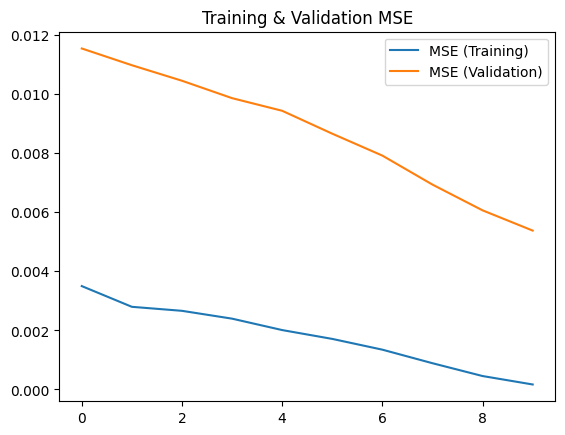

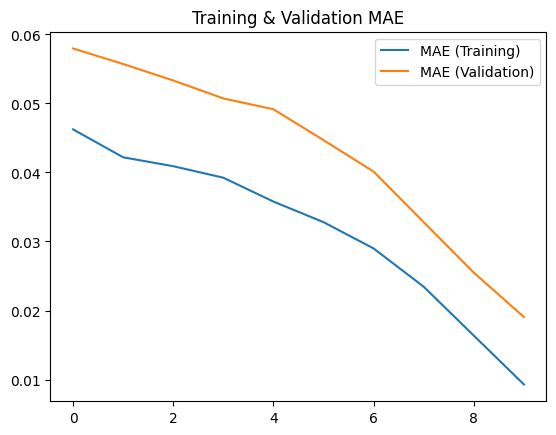

In [ ]:
import matplotlib.pyplot as plt

# Plot MSE dan MAE selama training
plt.plot(history.history['loss'], label='MSE (Training)')
plt.plot(history.history['val_loss'], label='MSE (Validation)')
plt.legend()
plt.title('Training & Validation MSE')
plt.show()

plt.plot(history.history['mae'], label='MAE (Training)')
plt.plot(history.history['val_mae'], label='MAE (Validation)')
plt.legend()
plt.title('Training & Validation MAE')
plt.show()


In [ ]:
# Output akhir
output = data[['title', 'distance_to_center_km', 'predicted_score']].sort_values(by='predicted_score', ascending=False)
print(output)

                                             title  distance_to_center_km  \
83                               Food Court Melati               2.988818   
11                            Nakoa Cafe Panjaitan               2.973359   
59                 Jiwonggo Warung & Kafe Keluarga               3.128193   
90             PUJASERA UB (Universitas Brawijaya)               3.245460   
12                                    Burger Lujab               3.258556   
..                                             ...                    ...   
97                                Xtreme Foodcourt               5.070979   
3    Kakkoii Japanese BBQ & Shabu - Soekarno Hatta               5.076386   
107                                Pujasera Kamila               5.316350   
94                              KeTimor Food Court               5.339029   
88                          Food Court Dinoyo Mall               5.623933   

     predicted_score  
83          0.660914  
11          0.660818  
59    

In [ ]:
# Menyimpan model ke file .h5
model.save('model.h5')

In [ ]:
# Mengonversi model ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Menyimpan model TensorFlow Lite ke file .tflite
with open('model_relevansi_jarakkota.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpyut98mya'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133434928544256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133434928535456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133434928543552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133434927059840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133434927059664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133434927055088: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
pip install tensorflowjs


In [ ]:
import tensorflowjs as tfjs

# Mengonversi model .h5 ke format TensorFlow.js
tensorflowjs_converter --input_format keras model.h5 model_tfjs/

SyntaxError: invalid syntax (<ipython-input-2-d688ec48f90c>, line 4)

In [ ]:
import subprocess

# Tentukan path model .h5 dan folder output untuk model TensorFlow.js
h5_model_path = 'model.h5'
output_folder = 'model_tfjs/'

# Menjalankan perintah tensorflowjs_converter menggunakan subprocess
subprocess.run(['tensorflowjs_converter', '--input_format', 'keras', h5_model_path, output_folder])

print("Model berhasil dikonversi!")


Model berhasil dikonversi!
